In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('Housing.csv')

In [ ]:
print(data.head)

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

In [ ]:
print(data.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


<ipython-input-27-3ebd1f542d07>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


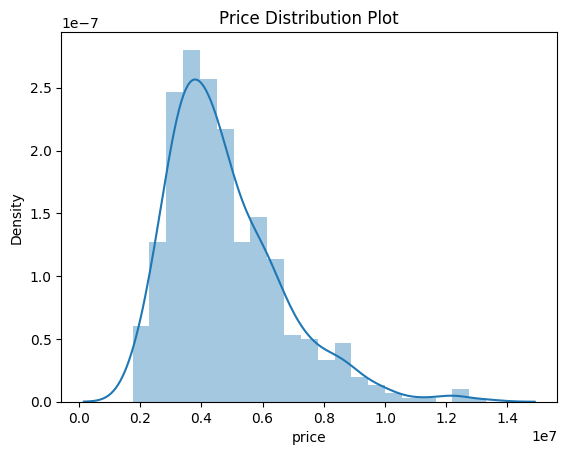

In [ ]:
plt.title('Price Distribution Plot')
sns.distplot(data['price'])
plt.show()

In [ ]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                       'airconditioning', 'prefarea', 'furnishingstatus']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

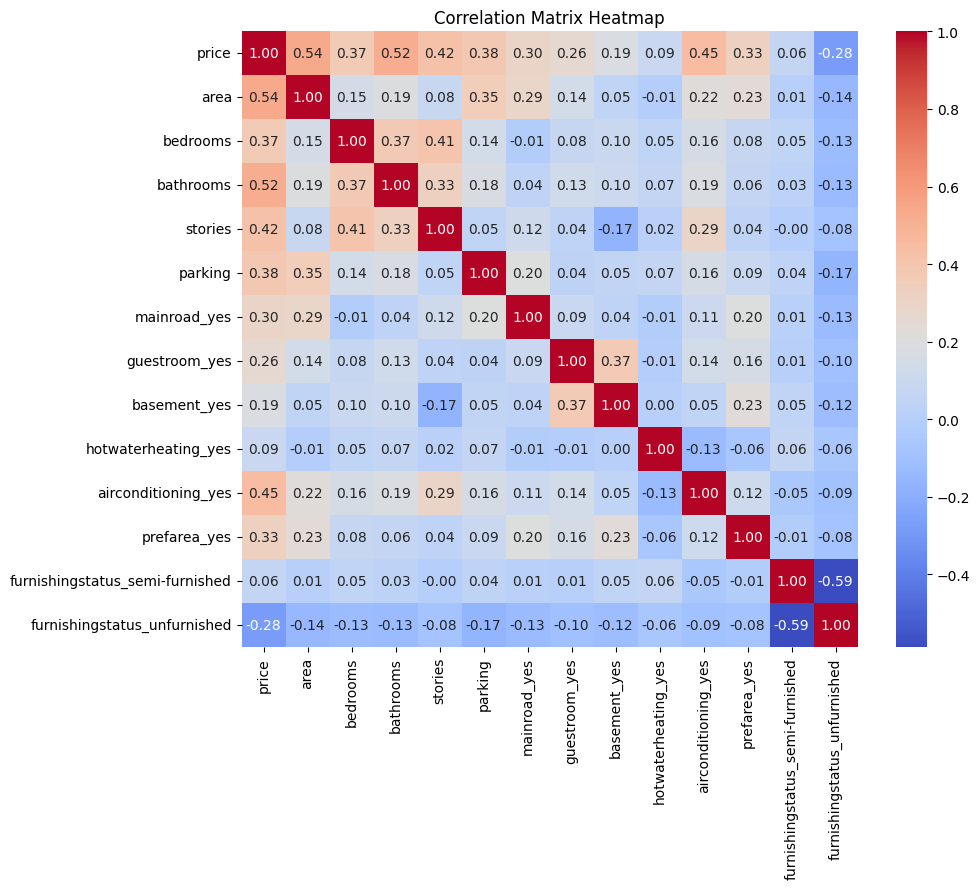

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [ ]:
new= data[['area','price']].copy()


In [ ]:
new

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000
...,...,...
540,3000,1820000
541,2400,1767150
542,3620,1750000
543,2910,1750000


In [ ]:
X = new[['area']]
y = new['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Spliting data into 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting test data
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[5024060.33139816 5279498.23656143 4232202.82539203 4640903.47365326
 4198144.43803692 5373158.80178796 6139472.51727777 4636646.17523387
 3891618.951841   3661724.83719406 6165016.3077941  4187075.46214652
 4095969.27597162 3832016.77396957 4202401.73645631 4057653.59019713
 3363713.94783691 5066633.31559204 5002773.83930122 5066633.31559204
 4649418.07049203 5417860.43519154 4065742.45719396 4130027.66332672
 6024525.4599543  6752523.48966962 3827759.47555018 3789443.78977569
 8131888.17755128 3789443.78977569 4215173.63171447 3840531.37080835
 5066633.31559204 5328457.16838439 4545114.25921703 4470611.53687774
 4490195.10960693 3866075.16132467 3993794.11390631 3698763.33344273
 5909578.40263083 4057653.59019713 5245439.84920633 4300319.60010223
 5385930.69704613 5017674.38376908 5066633.31559204 4487640.7305553
 5939379.49156655 3789443.78977569 5694584.83245175 3789443.78977569
 5820175.13582369 4428038.55268387 4061910.88861651 3751128.1040012
 4960200.85510734 3534005.88461242 5

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
print(r2)

0.27287851871974644


In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print(mse)

3675286604768.185


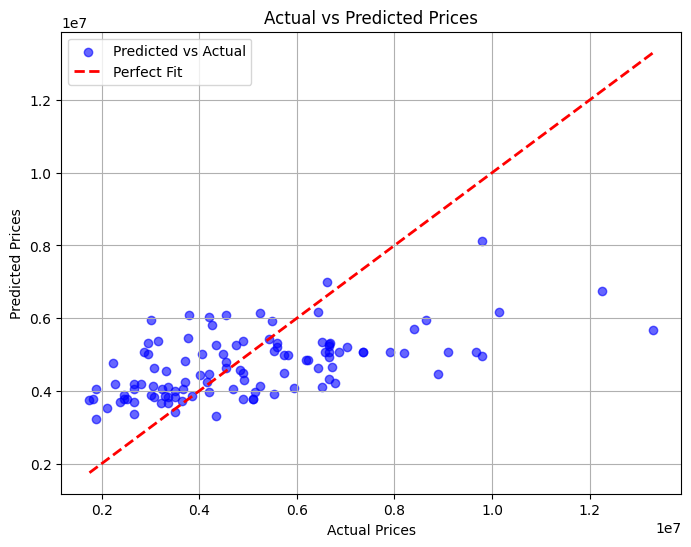

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import math

In [ ]:
rmse = mse ** (1/2)

In [ ]:
print(rmse)

1917103.7021424233


In [ ]:
#multiple
y = df['price']
X = df.drop('price', axis=1)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef}")

Mean Squared Error (MSE): 1754318687330.6638
R² Score: 0.6529242642153184
Intercept: 260032.35760741215
Coefficients:
  area: 235.9688045413957
  bedrooms: 76778.7016343784
  bathrooms: 1094444.7861005957
  stories: 407476.59498491115
  parking: 224841.91327662673
  mainroad_yes: 367919.9476795722
  guestroom_yes: 231610.0371756495
  basement_yes: 390251.17618109327
  hotwaterheating_yes: 684649.8853387912
  airconditioning_yes: 791426.7358431868
  prefarea_yes: 629890.5653133605
  furnishingstatus_semi-furnished: -126881.81758510851
  furnishingstatus_unfurnished: -413645.062228222


In [ ]:
if 'area' in df.columns:
    X_area = df[['area']]
    y_price = df['price']

    area_model = LinearRegression()
    area_model.fit(X_area, y_price)
    y_line = area_model.predict(X_area)

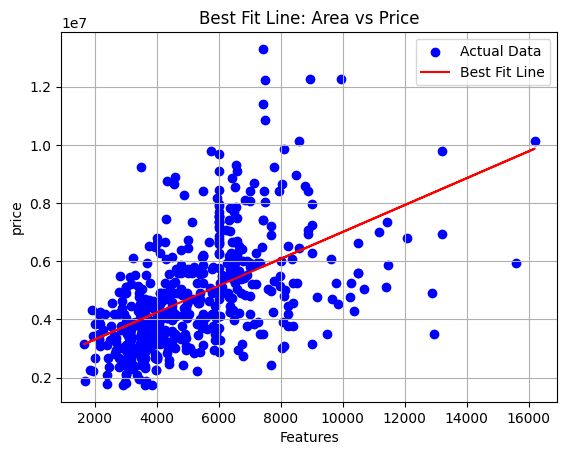

In [ ]:

    plt.scatter(X_area, y_price, color='blue', label='Actual Data')
    plt.plot(X_area, y_line, color='red', label='Best Fit Line')
    plt.xlabel('Features')
    plt.ylabel('price')
    plt.title('Best Fit Line: Area vs Price')
    plt.legend()
    plt.grid(True)
    plt.show()